# Exploitation graphique SIRAC Strasbourg
### Luka Fegyveres

In [1]:
import os
import sqlite3
import numpy    as np
import datetime
import time
import pandas   as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:


#dir = os.chdir('C:\\Users\\lukaf\\OneDrive - Ecole Polytechnique\\Bureau\\Polytechnique\\4A\\Ponts\\VET\\S1\\MCNDU\\Projet Strasbourg')
dir = os.chdir('C:\\Users\\lukaf\\OneDrive - Ecole Polytechnique\\Bureau\\Polytechnique\\4A\\Ponts\\VET\\S1\\MCNDU\\project_MCNDU')

In [3]:
SIRAC = pd.read_csv('DATA\\api_sirac_maj_2025_12_17.csv', sep=';',encoding='latin-1')


In [4]:
SIRAC

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude
0,0,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.562080,7.698018
1,1,2,Schirmeck2 - Sortie Ville,2,0,-1,0,-1,0.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.562225,7.697830
2,2,3,Schirmeck3 - Entree Ville,1,13,1,214,0,36.373814,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.563495,7.703633
3,3,4,Schirmeck4 - Sortie Ville,1,10,2,230,2,25.252525,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.563632,7.703529
4,4,5,Schirmeck5 - Entree Ville,1,21,8,342,5,17.700607,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.566286,7.708155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742891,517771,1321,RP dÃ©cathlon - C1091,2,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.523962,7.690701
742892,517772,1322,RP RM84 - C1091,2,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.521668,7.693462
742893,517773,1323,C1091 - RP RM84,2,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.521554,7.693270
742894,517774,1324,C1012 - RM484,1,0,-1,0,-1,0.000000,2025-12-17T12:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 13:06:37,48.530763,7.688053


In [5]:

#Voir les noms de colonnes : 
SIRAC.info()#list(SIRAC)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742896 entries, 0 to 742895
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   742896 non-null  int64  
 1   ident        742896 non-null  int64  
 2   name         742896 non-null  object 
 3   etat         742896 non-null  int64  
 4   debit        742896 non-null  int64  
 5   taux         742896 non-null  int64  
 6   debitlisse   742896 non-null  int64  
 7   tauxlisse    742896 non-null  int64  
 8   vitessebrp   742896 non-null  float64
 9   ts           742896 non-null  object 
 10  etatexp      742896 non-null  int64  
 11  dmajetatexp  742896 non-null  object 
 12  time         742896 non-null  object 
 13  latitude     742896 non-null  float64
 14  longitude    742896 non-null  float64
dtypes: float64(3), int64(8), object(4)
memory usage: 85.0+ MB


## Analyse de la circulation par tronçon 

In [36]:
SIRAC_tronçon = SIRAC[SIRAC.ident==436]
SIRAC_tronçon

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude
172,172,436,Cyc.Pl.Haguenau->KablÃ©,1,0,0,20,0,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.592665,7.743958
641,641,436,Cyc.Pl.Haguenau->KablÃ©,1,0,0,20,0,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:05:17,48.592665,7.743958
1110,1110,436,Cyc.Pl.Haguenau->KablÃ©,1,0,0,20,0,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:35:17,48.592665,7.743958
1579,1579,436,Cyc.Pl.Haguenau->KablÃ©,1,0,0,20,0,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:05:18,48.592665,7.743958
2048,2048,436,Cyc.Pl.Haguenau->KablÃ©,1,0,0,20,0,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:35:19,48.592665,7.743958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740723,515603,436,Cyc.Pl.Haguenau->KablÃ©,1,2,0,38,0,0.0,2025-12-17T09:30:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:06:24,48.592665,7.743958
741192,516072,436,Cyc.Pl.Haguenau->KablÃ©,1,3,0,48,0,0.0,2025-12-17T10:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:36:26,48.592665,7.743958
741661,516541,436,Cyc.Pl.Haguenau->KablÃ©,1,7,0,44,0,0.0,2025-12-17T11:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:06:34,48.592665,7.743958
742130,517010,436,Cyc.Pl.Haguenau->KablÃ©,1,3,0,36,0,0.0,2025-12-17T12:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:36:35,48.592665,7.743958


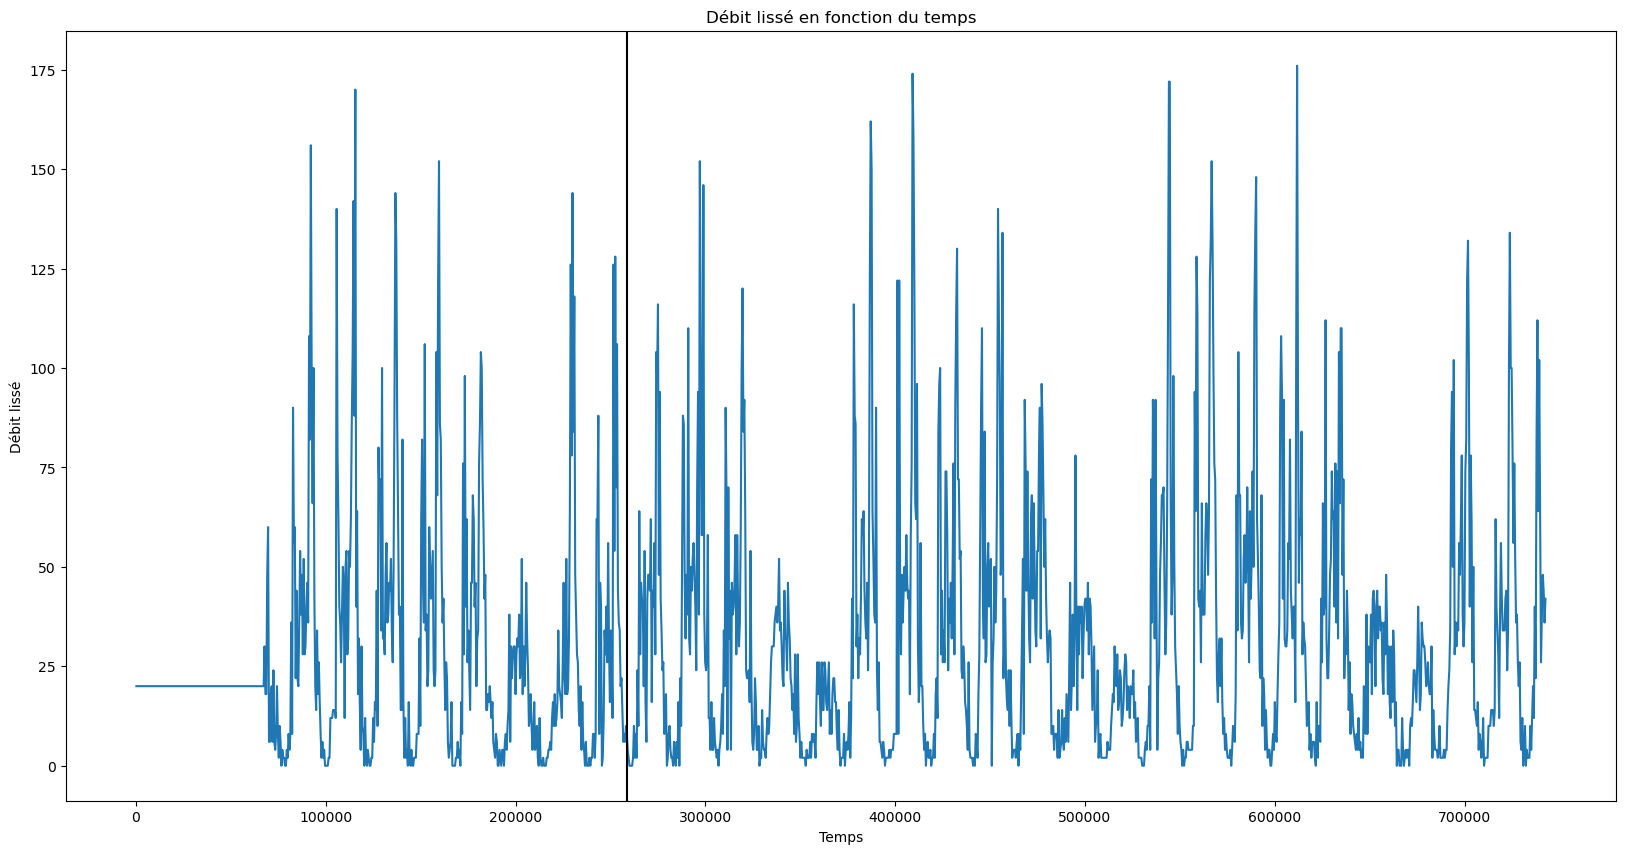

In [37]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['debitlisse'])
plt.xlabel("Temps")
plt.ylabel("Débit lissé")
plt.title("Débit lissé en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

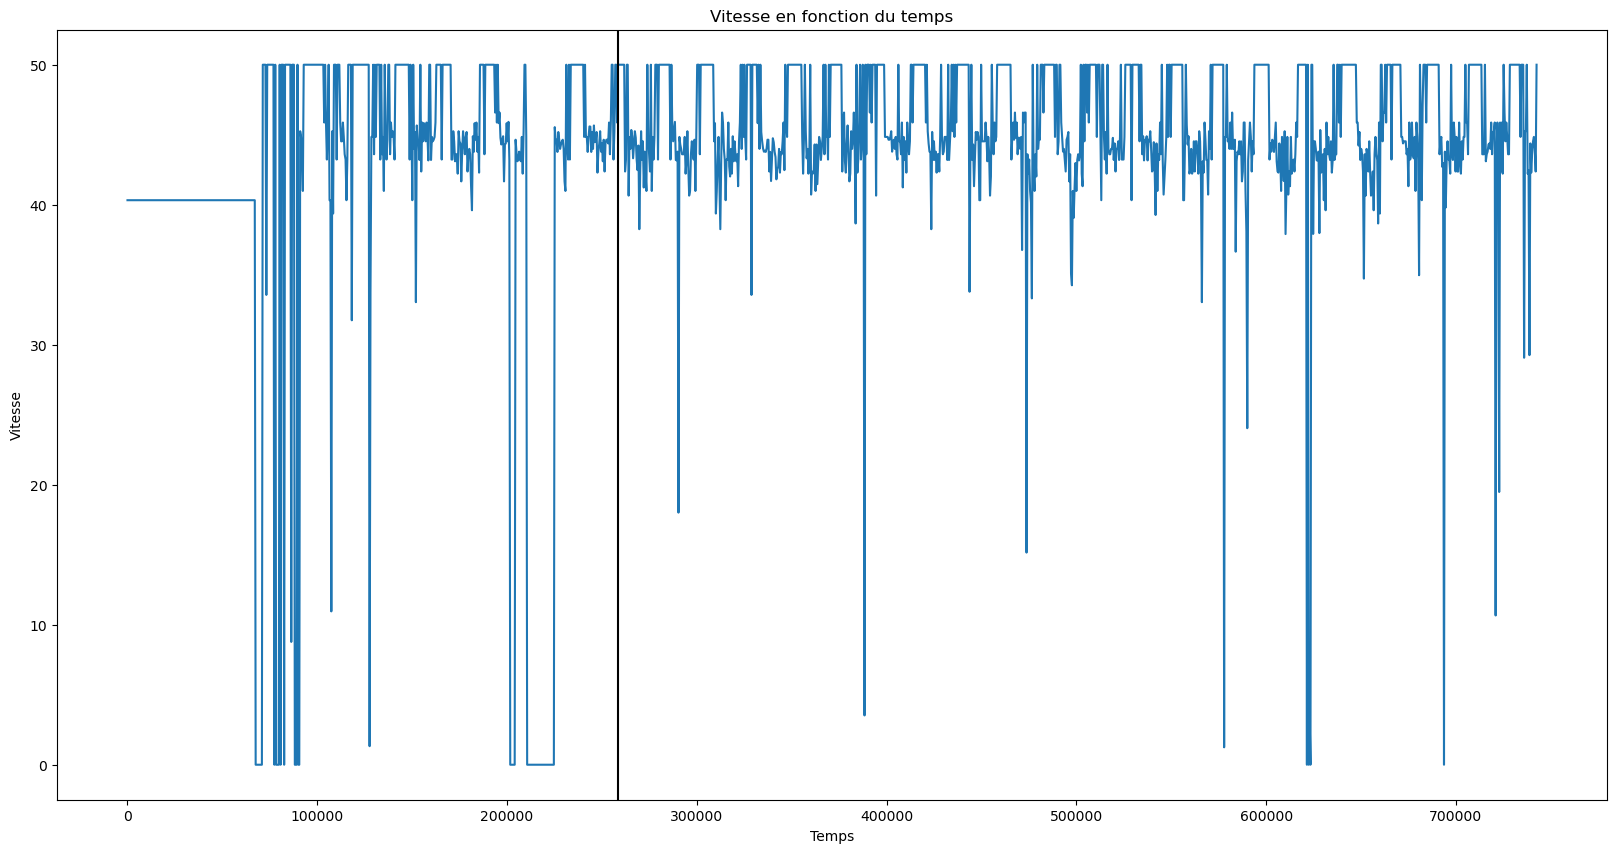

In [9]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['vitessebrp'])
plt.xlabel("Temps")
plt.ylabel("Vitesse")
plt.title("Vitesse en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

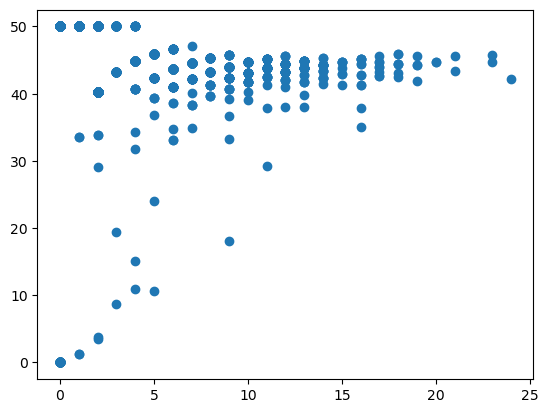

In [10]:
plt.scatter(SIRAC_tronçon['debit'], SIRAC_tronçon['vitessebrp'])

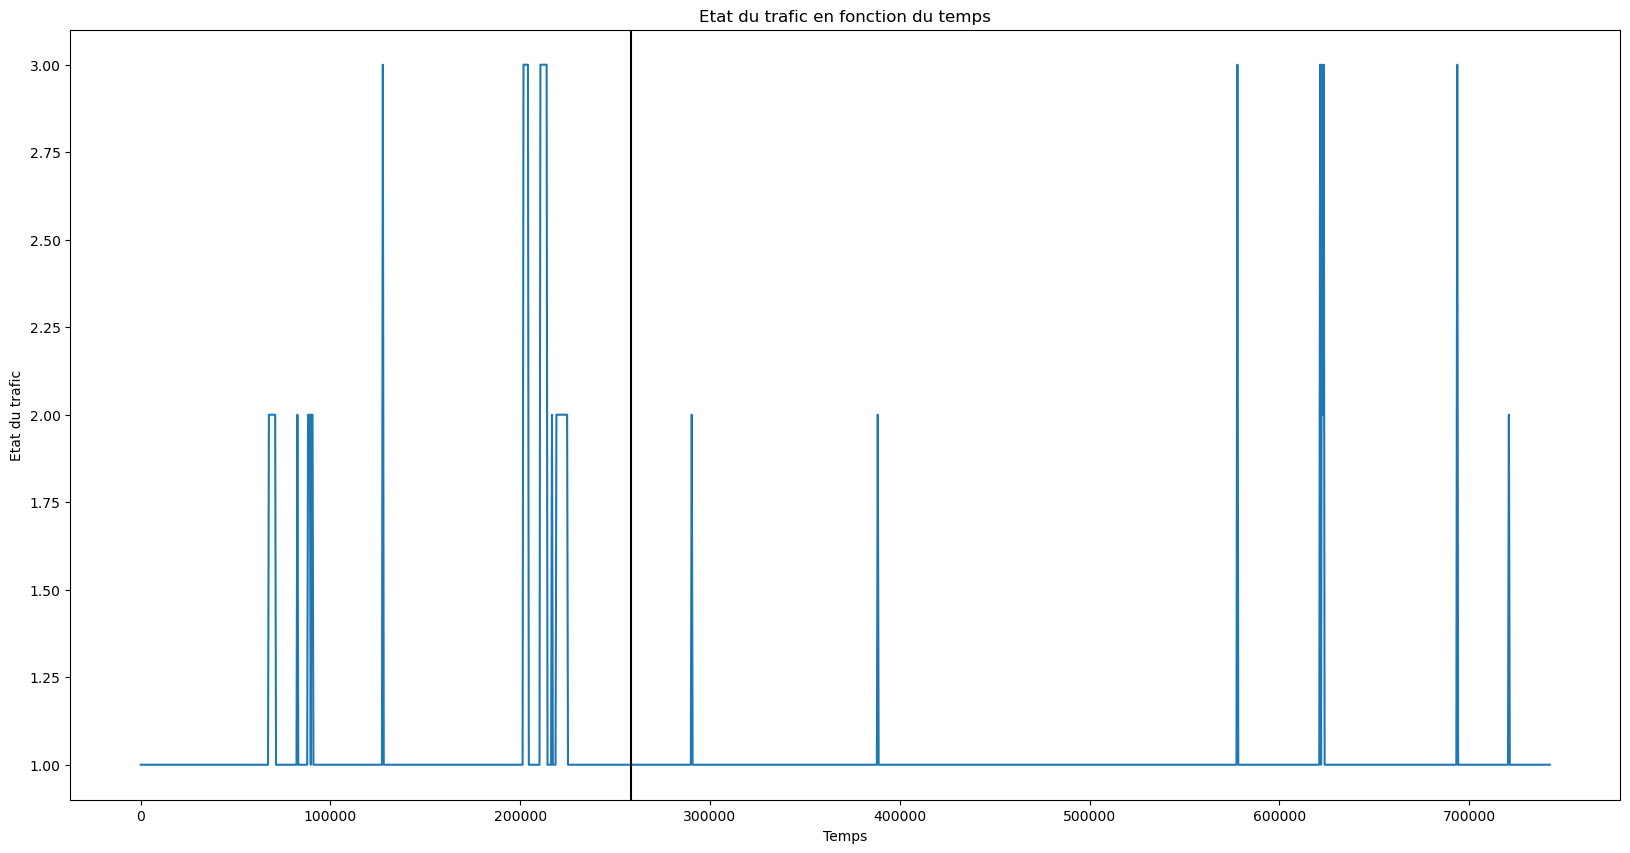

In [11]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['etat'])
plt.xlabel("Temps")
plt.ylabel("Etat du trafic")
plt.title("Etat du trafic en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

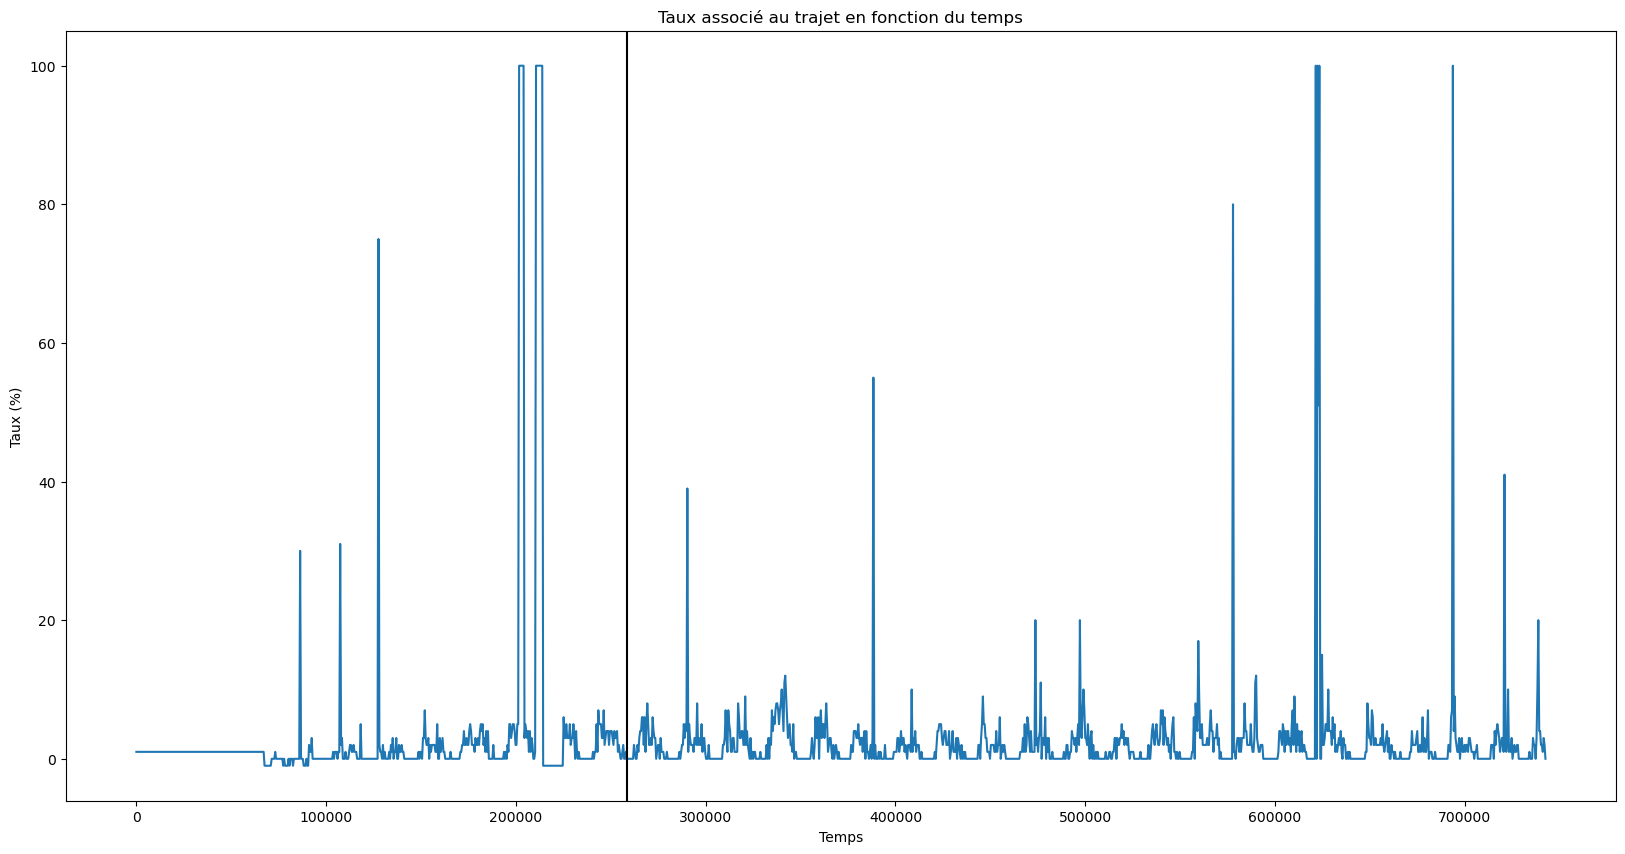

In [12]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_tronçon['taux'])
plt.xlabel("Temps")
plt.ylabel("Taux (%)")
plt.title("Taux associé au trajet en fonction du temps")
plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.show()

## Analyse de la circulation par zone

In [7]:
coordonnees_sirac = pd.read_csv("coordinates_sirac.csv", sep = ";")

In [8]:
coordonnees_sirac

,Unnamed: 0,name,lat,lon,zone
0,0,Schirmeck1 - Entree Ville,48.562080,7.698018,3
1,1,Schirmeck2 - Sortie Ville,48.562225,7.697830,3
2,2,Schirmeck3 - Entree Ville,48.563495,7.703633,3
3,3,Schirmeck4 - Sortie Ville,48.563632,7.703529,3
4,4,Schirmeck5 - Entree Ville,48.566286,7.708155,3
...,...,...,...,...,...
464,464,RP décathlon - C1091,48.523962,7.690701,3
465,465,RP RM84 - C1091,48.521668,7.693462,3
466,466,C1091 - RP RM84,48.521554,7.693270,3
467,467,C1012 - RM484,48.530763,7.688053,3


In [92]:
SIRAC_avec_zone = pd.merge(SIRAC, coordonnees_sirac[['name','zone']], on='name')
SIRAC_avec_zone['time'] = pd.to_datetime(SIRAC_avec_zone['time'])
SIRAC_avec_zone['demi_heure'] = SIRAC_avec_zone['time'].dt.floor('30T').dt.time
SIRAC_avec_zone['jour_semaine'] = SIRAC_avec_zone['time'].dt.day_name()

In [93]:
SIRAC_avec_zone

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude,zone,demi_heure,jour_semaine
0,0,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.56208,7.698018,3,20:30:00,Wednesday
1,469,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:05:17,48.56208,7.698018,3,21:00:00,Wednesday
2,938,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:35:17,48.56208,7.698018,3,21:30:00,Wednesday
3,1407,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:05:18,48.56208,7.698018,3,22:00:00,Wednesday
4,1876,1,Schirmeck1 - Entree Ville,1,0,-1,0,-1,0.0,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:35:19,48.56208,7.698018,3,22:30:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617755,515899,1325,RM484 - C1012,3,0,-1,0,-1,0.0,2025-12-17T10:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:06:24,48.53052,7.688116,3,11:00:00,Wednesday
617756,516368,1325,RM484 - C1012,2,0,-1,0,-1,0.0,2025-12-17T10:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:36:26,48.53052,7.688116,3,11:30:00,Wednesday
617757,516837,1325,RM484 - C1012,1,0,-1,0,-1,0.0,2025-12-17T11:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:06:34,48.53052,7.688116,3,12:00:00,Wednesday
617758,517306,1325,RM484 - C1012,1,0,-1,0,-1,0.0,2025-12-17T12:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:36:35,48.53052,7.688116,3,12:30:00,Wednesday


In [94]:
SIRAC_zone_1 = SIRAC_avec_zone[SIRAC_avec_zone["zone"] == 1]
SIRAC_zone_2 = SIRAC_avec_zone[SIRAC_avec_zone["zone"] == 2]
SIRAC_zone_3 = SIRAC_avec_zone[SIRAC_avec_zone["zone"] == 3]

In [95]:
SIRAC_zone_1

,Unnamed: 0,ident,name,etat,debit,taux,debitlisse,tauxlisse,vitessebrp,ts,etatexp,dmajetatexp,time,latitude,longitude,zone,demi_heure,jour_semaine
45936,29,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 20:35:16,48.583282,7.744032,1,20:30:00,Wednesday
45937,498,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:05:17,48.583282,7.744032,1,21:00:00,Wednesday
45938,967,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 21:35:17,48.583282,7.744032,1,21:30:00,Wednesday
45939,1436,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:05:18,48.583282,7.744032,1,22:00:00,Wednesday
45940,1905,100,Tanneurs,1,1,0,76,2,40.000000,2025-11-12T20:30:30+00:00,0,2025-10-28T11:36:09+00:00,2025-11-12 22:35:19,48.583282,7.744032,1,22:30:00,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430843,515766,850,Wilson 884-881,1,25,4,410,3,25.000000,2025-12-17T10:33:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:06:24,48.589201,7.740189,1,11:00:00,Wednesday
430844,516235,850,Wilson 884-881,1,20,3,490,4,25.477707,2025-12-17T11:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 11:36:26,48.589201,7.740189,1,11:30:00,Wednesday
430845,516704,850,Wilson 884-881,1,24,3,420,3,27.210886,2025-12-17T09:30:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:06:34,48.589201,7.740189,1,12:00:00,Wednesday
430846,517173,850,Wilson 884-881,1,21,3,440,3,25.949951,2025-12-17T12:03:30+00:00,0,2025-11-28T09:29:09+00:00,2025-12-17 12:36:35,48.589201,7.740189,1,12:30:00,Wednesday


In [71]:
SIRAC_zone_1_moyenne = SIRAC_zone_1[['debitlisse','time']].groupby(['time']).mean()
SIRAC_zone_2_moyenne = SIRAC_zone_2[['debitlisse','time']].groupby(['time']).mean()
SIRAC_zone_3_moyenne = SIRAC_zone_3[['debitlisse','time']].groupby(['time']).mean()

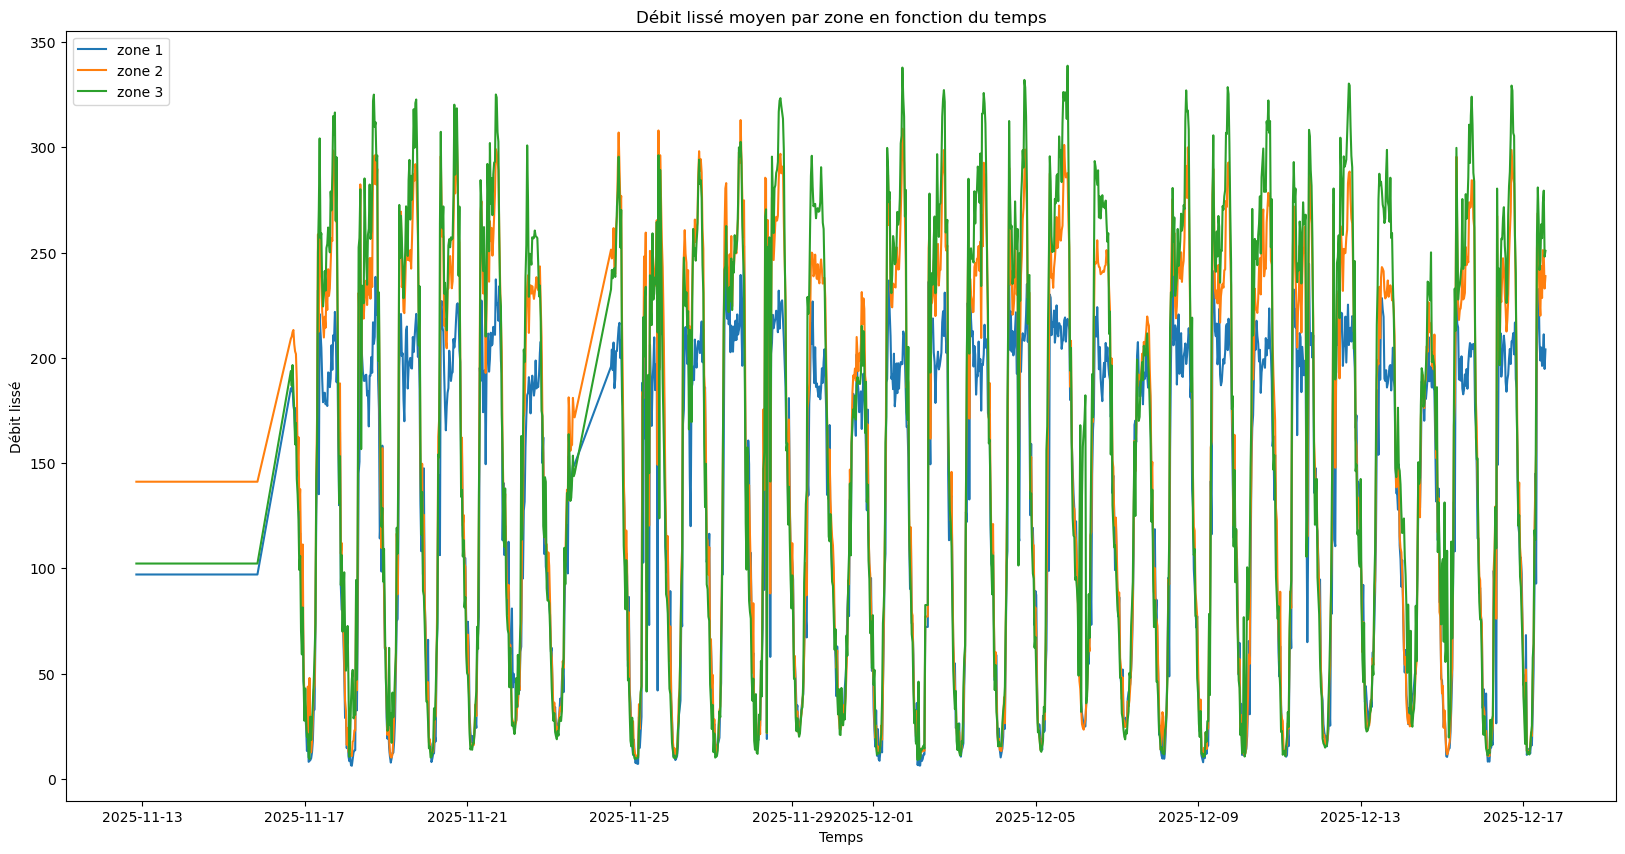

In [72]:
plt.figure(figsize=(20,10))
plt.plot(SIRAC_zone_1_moyenne['debitlisse'], label = 'zone 1')
plt.plot(SIRAC_zone_2_moyenne['debitlisse'], label = 'zone 2')
plt.plot(SIRAC_zone_3_moyenne['debitlisse'], label = 'zone 3')
plt.xlabel("Temps")
plt.ylabel("Débit lissé")
plt.title("Débit lissé moyen par zone en fonction du temps")
#plt.axvline(x=258456,color='black') #Ajout d'une ligne verticale
plt.legend()
plt.show()

## Semaine type

In [16]:
jour_ouvre = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
week_end = ['Saturday', 'Sunday']
debut_marche = pd.to_datetime('2025-11-26')

In [96]:
SIRAC_avec_zone_avant_marche = SIRAC_avec_zone[SIRAC_avec_zone['time']<debut_marche]
SIRAC_avec_zone_apres_marche = SIRAC_avec_zone[SIRAC_avec_zone['time']>=debut_marche]

SIRAC_avant_marche_zone_1 = SIRAC_avec_zone_avant_marche[SIRAC_avec_zone_avant_marche["zone"] == 1]
SIRAC_avant_marche_zone_2 = SIRAC_avec_zone_avant_marche[SIRAC_avec_zone_avant_marche["zone"] == 2]
SIRAC_avant_marche_zone_3 = SIRAC_avec_zone_avant_marche[SIRAC_avec_zone_avant_marche["zone"] == 3]

SIRAC_apres_marche_zone_1 = SIRAC_avec_zone_apres_marche[SIRAC_avec_zone_apres_marche["zone"] == 1]
SIRAC_apres_marche_zone_2 = SIRAC_avec_zone_apres_marche[SIRAC_avec_zone_apres_marche["zone"] == 2]
SIRAC_apres_marche_zone_3 = SIRAC_avec_zone_apres_marche[SIRAC_avec_zone_apres_marche["zone"] == 3]

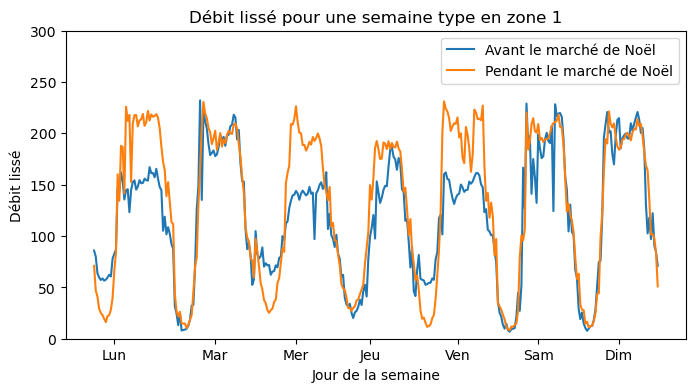

In [74]:
# Semaine type zone 1
SIRAC_avant_marche_semaine_zone_1 = SIRAC_avant_marche_zone_1.groupby(['jour_semaine', 'demi_heure'])['debitlisse'].mean()
SIRAC_avant_marche_semaine_zone_1_1d = SIRAC_avant_marche_semaine_zone_1.reset_index()
SIRAC_apres_marche_semaine_zone_1 = SIRAC_apres_marche_zone_1.groupby(['jour_semaine', 'demi_heure'])['debitlisse'].mean()
SIRAC_apres_marche_semaine_zone_1_1d = SIRAC_apres_marche_semaine_zone_1.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

SIRAC_avant_marche_semaine_zone_1_1d['debitlisse'].plot(ax = ax,
                                       title = 'Débit lissé pour une semaine type en zone 1', 
                                       ylabel = 'Débit lissé',
                                       xlabel = 'Jour de la semaine',
                                       label= "Avant le marché de Noël",
                                       ylim = (0,300),
                                       )

SIRAC_apres_marche_semaine_zone_1_1d['debitlisse'].plot(ax = ax,
                                       title = 'Débit lissé pour une semaine type en zone 1', 
                                       ylabel = 'Débit lissé',
                                       xlabel = 'Jour de la semaine',
                                       label= "Pendant le marché de Noël",
                                       ylim = (0,300),
                                       )

plt.xticks(
    ticks=[12, 72, 120, 164, 216, 264, 312],
    labels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
)

plt.legend()

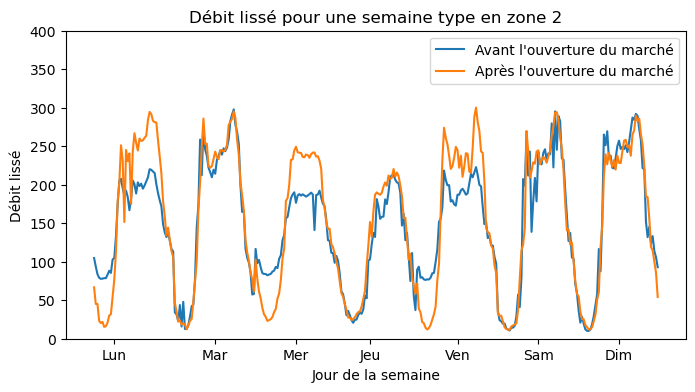

In [ ]:
# Semaine type zone 2
SIRAC_avant_marche_semaine_zone_2 = SIRAC_avant_marche_zone_2.groupby(['jour_semaine', 'demi_heure'])['debitlisse'].mean()
SIRAC_avant_marche_semaine_zone_2_2d = SIRAC_avant_marche_semaine_zone_2.reset_index()
SIRAC_apres_marche_semaine_zone_2 = SIRAC_apres_marche_zone_2.groupby(['jour_semaine', 'demi_heure'])['debitlisse'].mean()
SIRAC_apres_marche_semaine_zone_2_2d = SIRAC_apres_marche_semaine_zone_2.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

SIRAC_avant_marche_semaine_zone_2_2d['debitlisse'].plot(ax = ax,
                                       title = 'Débit lissé pour une semaine type en zone 2', 
                                       ylabel = 'Débit lissé',
                                       xlabel = 'Jour de la semaine',
                                       label= "Avant le marché de Noël",
                                       ylim = (0,400),
                                       )

SIRAC_apres_marche_semaine_zone_2_2d['debitlisse'].plot(ax = ax,
                                       title = 'Débit lissé pour une semaine type en zone 2', 
                                       ylabel = 'Débit lissé',
                                       xlabel = 'Jour de la semaine',
                                       label= "Pendant le marché de Noël",
                                       ylim = (0,400),
                                       )

plt.xticks(
    ticks=[12, 72, 120, 164, 216, 264, 312],
    labels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
)

plt.legend()

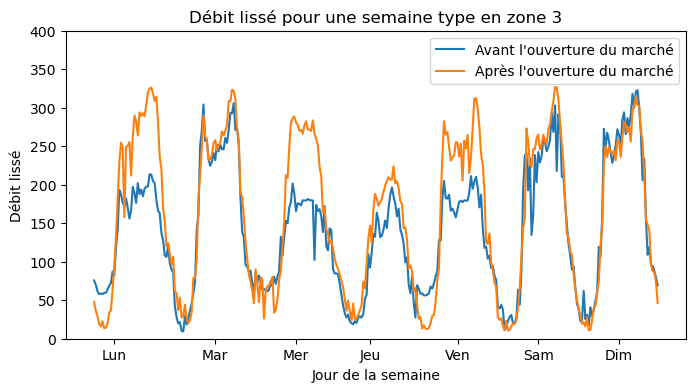

In [ ]:
# Semaine type zone 3
SIRAC_avant_marche_semaine_zone_3 = SIRAC_avant_marche_zone_3.groupby(['jour_semaine', 'demi_heure'])['debitlisse'].mean()
SIRAC_avant_marche_semaine_zone_3_3d = SIRAC_avant_marche_semaine_zone_3.reset_index()
SIRAC_apres_marche_semaine_zone_3 = SIRAC_apres_marche_zone_3.groupby(['jour_semaine', 'demi_heure'])['debitlisse'].mean()
SIRAC_apres_marche_semaine_zone_3_3d = SIRAC_apres_marche_semaine_zone_3.reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

SIRAC_avant_marche_semaine_zone_3_3d['debitlisse'].plot(ax = ax,
                                       title = 'Débit lissé pour une semaine type en zone 3', 
                                       ylabel = 'Débit lissé',
                                       xlabel = 'Jour de la semaine',
                                       label= "Avant le marché de Noël",
                                       ylim = (0,400),
                                       )

SIRAC_apres_marche_semaine_zone_3_3d['debitlisse'].plot(ax = ax,
                                       title = 'Débit lissé pour une semaine type en zone 3', 
                                       ylabel = 'Débit lissé',
                                       xlabel = 'Jour de la semaine',
                                       label= "Pendant le marché de Noël",
                                       ylim = (0,400),
                                       )

plt.xticks(
    ticks=[12, 72, 120, 164, 216, 264, 312],
    labels=['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
)

plt.legend()

## Journée type

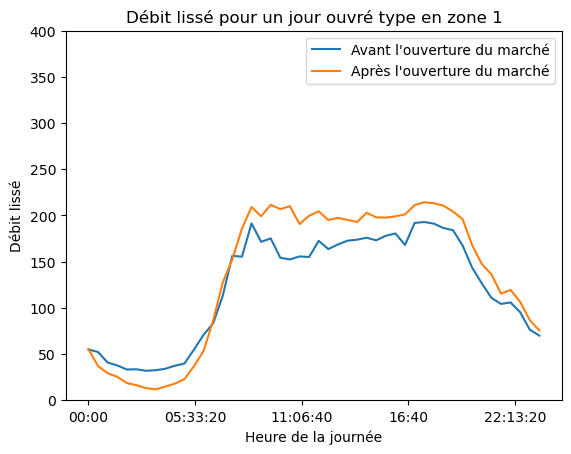

In [ ]:
# Journée type en jour ouvré zone 1

SIRAC_avant_marche_zone_1_ouvre = SIRAC_avant_marche_zone_1[SIRAC_avant_marche_zone_1['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_1_ouvre = SIRAC_apres_marche_zone_1[SIRAC_apres_marche_zone_1['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_1_ouvre.plot(title = 'Débit lissé pour un jour ouvré type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_1_ouvre.plot(title = 'Débit lissé pour un jour ouvré type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

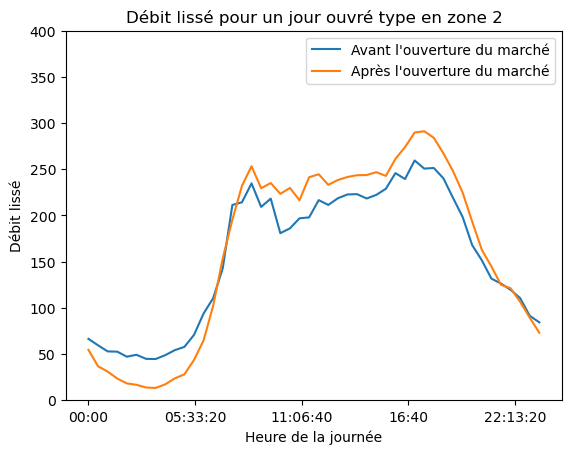

In [ ]:
# Journée type en jour ouvré zone 2

SIRAC_avant_marche_zone_2_ouvre = SIRAC_avant_marche_zone_2[SIRAC_avant_marche_zone_2['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_2_ouvre = SIRAC_apres_marche_zone_2[SIRAC_apres_marche_zone_2['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_2_ouvre.plot(title = 'Débit lissé pour un jour ouvré type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_2_ouvre.plot(title = 'Débit lissé pour un jour ouvré type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

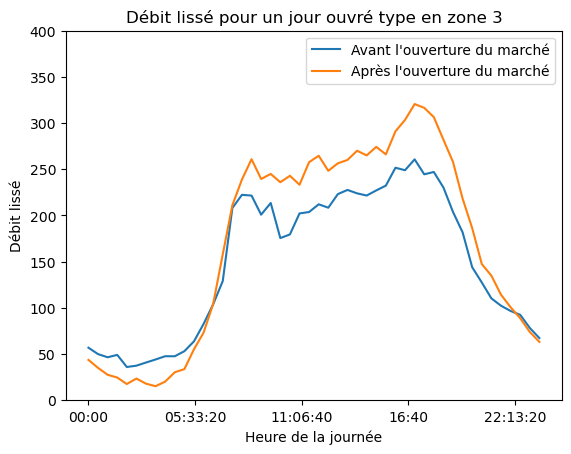

In [ ]:
# Journée type en jour ouvré zone 3

SIRAC_avant_marche_zone_3_ouvre = SIRAC_avant_marche_zone_3[SIRAC_avant_marche_zone_3['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_3_ouvre = SIRAC_apres_marche_zone_3[SIRAC_apres_marche_zone_3['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_3_ouvre.plot(title = 'Débit lissé pour un jour ouvré type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_3_ouvre.plot(title = 'Débit lissé pour un jour ouvré type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

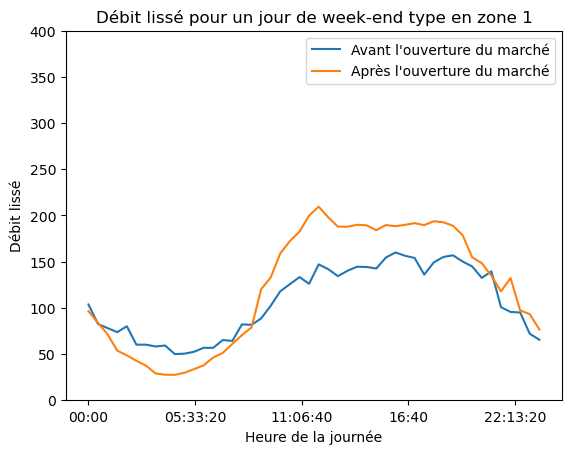

In [ ]:
# Journée type en week-end zone 1

SIRAC_avant_marche_zone_1_we = SIRAC_avant_marche_zone_1[SIRAC_avant_marche_zone_1['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_1_we = SIRAC_apres_marche_zone_1[SIRAC_apres_marche_zone_1['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_1_we.plot(title = 'Débit lissé pour un jour de week-end type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_1_we.plot(title = 'Débit lissé pour un jour de week-end type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

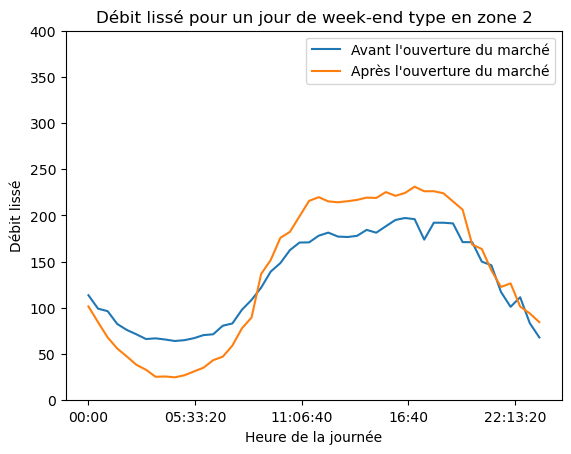

In [ ]:
# Journée type en week-end zone 2

SIRAC_avant_marche_zone_2_we = SIRAC_avant_marche_zone_2[SIRAC_avant_marche_zone_2['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_2_we = SIRAC_apres_marche_zone_2[SIRAC_apres_marche_zone_2['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_2_we.plot(title = 'Débit lissé pour un jour de week-end type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_2_we.plot(title = 'Débit lissé pour un jour de week-end type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

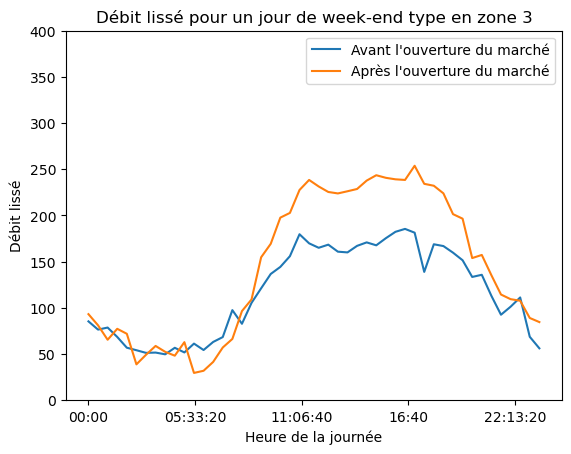

In [ ]:
# Journée type en week-end zone 3

SIRAC_avant_marche_zone_3_we = SIRAC_avant_marche_zone_3[SIRAC_avant_marche_zone_3['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_3_we = SIRAC_apres_marche_zone_3[SIRAC_apres_marche_zone_3['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_3_we.plot(title = 'Débit lissé pour un jour de week-end type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_3_we.plot(title = 'Débit lissé pour un jour de week-end type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

## Séparation vélos/voitures

In [107]:
SIRAC_avant_marche_zone_1['velo'] = SIRAC_avant_marche_zone_1['name'].apply(lambda x: x[:3])
SIRAC_avant_marche_zone_2['velo'] = SIRAC_avant_marche_zone_2['name'].apply(lambda x: x[:3])
SIRAC_avant_marche_zone_3['velo'] = SIRAC_avant_marche_zone_3['name'].apply(lambda x: x[:3])

SIRAC_apres_marche_zone_1['velo'] = SIRAC_apres_marche_zone_1['name'].apply(lambda x: x[:3])
SIRAC_apres_marche_zone_2['velo'] = SIRAC_apres_marche_zone_2['name'].apply(lambda x: x[:3])
SIRAC_apres_marche_zone_3['velo'] = SIRAC_apres_marche_zone_3['name'].apply(lambda x: x[:3])

C:\Users\lukaf\AppData\Local\Temp\ipykernel_24664\815561658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIRAC_avant_marche_zone_1['velo'] = SIRAC_avant_marche_zone_1['name'].apply(lambda x: x[:3])
C:\Users\lukaf\AppData\Local\Temp\ipykernel_24664\815561658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SIRAC_avant_marche_zone_2['velo'] = SIRAC_avant_marche_zone_2['name'].apply(lambda x: x[:3])
C:\Users\lukaf\AppData\Local\Temp\ipykernel_24664\815561658.py:3: SettingWithCopyWarning: 
A value is 

In [111]:
SIRAC_avant_marche_zone_1_velos = SIRAC_avant_marche_zone_1[SIRAC_avant_marche_zone_1["velo"] == 'Cyc']
SIRAC_avant_marche_zone_2_velos = SIRAC_avant_marche_zone_2[SIRAC_avant_marche_zone_2["velo"] == 'Cyc']
SIRAC_avant_marche_zone_3_velos = SIRAC_avant_marche_zone_3[SIRAC_avant_marche_zone_3["velo"] == 'Cyc']

SIRAC_apres_marche_zone_1_velos = SIRAC_apres_marche_zone_1[SIRAC_apres_marche_zone_1["velo"] == 'Cyc']
SIRAC_apres_marche_zone_2_velos = SIRAC_apres_marche_zone_2[SIRAC_apres_marche_zone_2["velo"] == 'Cyc']
SIRAC_apres_marche_zone_3_velos = SIRAC_apres_marche_zone_3[SIRAC_apres_marche_zone_3["velo"] == 'Cyc']

SIRAC_avant_marche_zone_1_voitures = SIRAC_avant_marche_zone_1[SIRAC_avant_marche_zone_1["velo"] != 'Cyc']
SIRAC_avant_marche_zone_2_voitures = SIRAC_avant_marche_zone_2[SIRAC_avant_marche_zone_2["velo"] != 'Cyc']
SIRAC_avant_marche_zone_3_voitures = SIRAC_avant_marche_zone_3[SIRAC_avant_marche_zone_3["velo"] != 'Cyc']

SIRAC_apres_marche_zone_1_voitures = SIRAC_apres_marche_zone_1[SIRAC_apres_marche_zone_1["velo"] != 'Cyc']
SIRAC_apres_marche_zone_2_voitures = SIRAC_apres_marche_zone_2[SIRAC_apres_marche_zone_2["velo"] != 'Cyc']
SIRAC_apres_marche_zone_3_voitures = SIRAC_apres_marche_zone_3[SIRAC_apres_marche_zone_3["velo"] != 'Cyc']

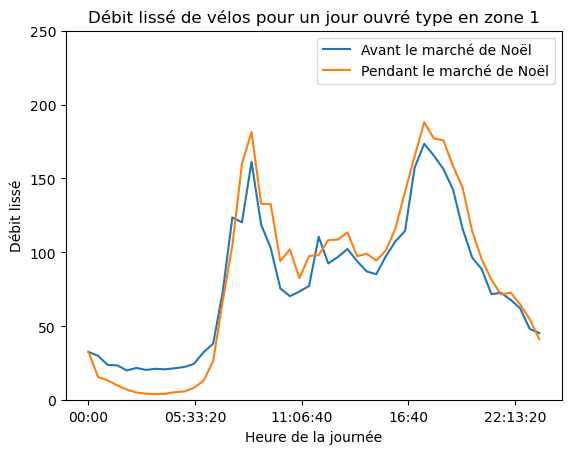

In [132]:
# Journée type en jour ouvré vélos zone 1

SIRAC_avant_marche_zone_1_ouvre_velos = SIRAC_avant_marche_zone_1_velos[SIRAC_avant_marche_zone_1_velos['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_1_ouvre_velos = SIRAC_apres_marche_zone_1_velos[SIRAC_apres_marche_zone_1_velos['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_1_ouvre_velos.plot(title = 'Débit lissé de vélos pour un jour ouvré type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_1_ouvre_velos.plot(title = 'Débit lissé de vélos pour un jour ouvré type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,250))

plt.legend()

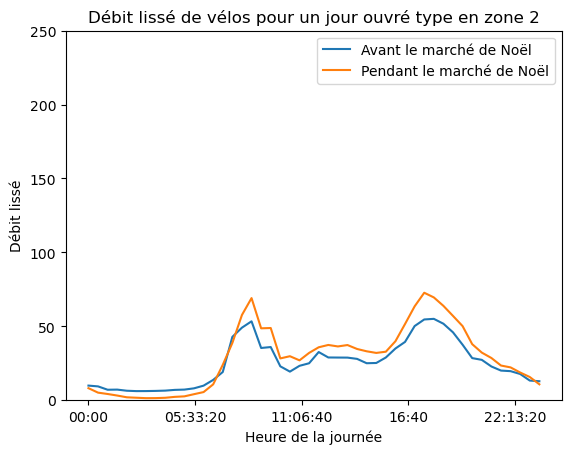

In [120]:
# Journée type en jour ouvré vélos zone 2

SIRAC_avant_marche_zone_2_ouvre_velos = SIRAC_avant_marche_zone_2_velos[SIRAC_avant_marche_zone_2_velos['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_2_ouvre_velos = SIRAC_apres_marche_zone_2_velos[SIRAC_apres_marche_zone_2_velos['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_2_ouvre_velos.plot(title = 'Débit lissé de vélos pour un jour ouvré type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_2_ouvre_velos.plot(title = 'Débit lissé de vélos pour un jour ouvré type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,250))

plt.legend()

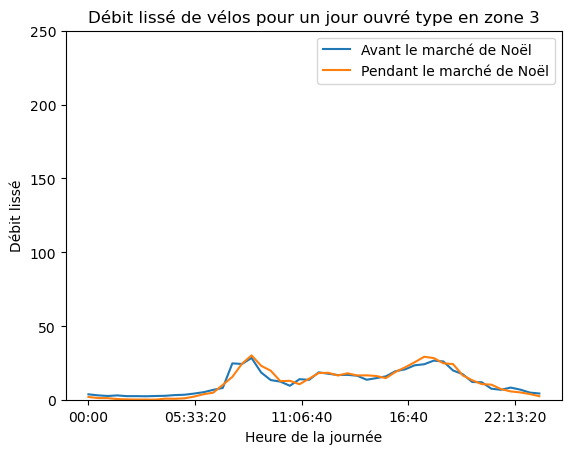

In [121]:
# Journée type en jour ouvré vélos zone 3

SIRAC_avant_marche_zone_3_ouvre_velos = SIRAC_avant_marche_zone_3_velos[SIRAC_avant_marche_zone_3_velos['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_3_ouvre_velos = SIRAC_apres_marche_zone_3_velos[SIRAC_apres_marche_zone_3_velos['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_3_ouvre_velos.plot(title = 'Débit lissé de vélos pour un jour ouvré type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_3_ouvre_velos.plot(title = 'Débit lissé de vélos pour un jour ouvré type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,250))

plt.legend()

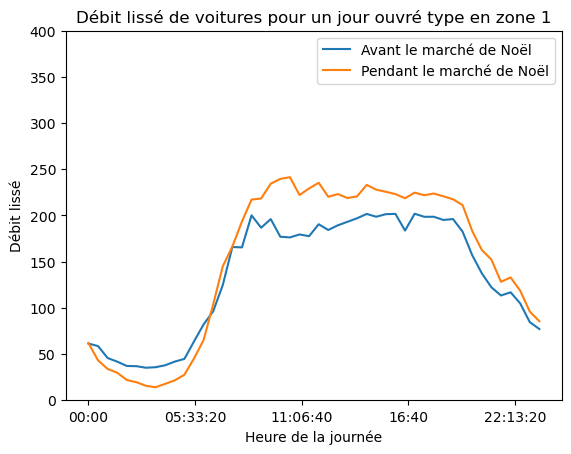

In [126]:
# Journée type en jour ouvré voitures zone 1

SIRAC_avant_marche_zone_1_ouvre_voitures = SIRAC_avant_marche_zone_1_voitures[SIRAC_avant_marche_zone_1_voitures['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_1_ouvre_voitures = SIRAC_apres_marche_zone_1_voitures[SIRAC_apres_marche_zone_1_voitures['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_1_ouvre_voitures.plot(title = 'Débit lissé de voitures pour un jour ouvré type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_1_ouvre_voitures.plot(title = 'Débit lissé de voitures pour un jour ouvré type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

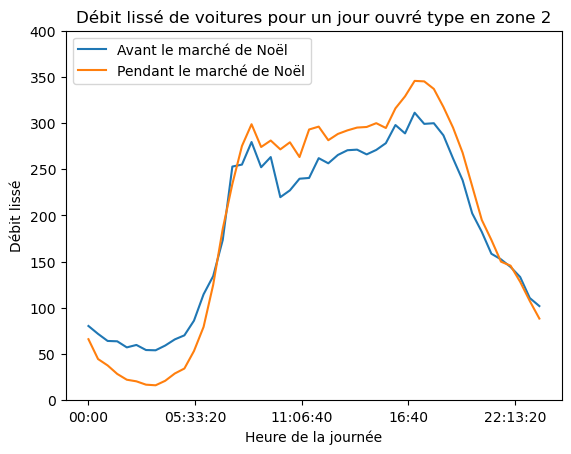

In [129]:
# Journée type en jour ouvré voitures zone 2

SIRAC_avant_marche_zone_2_ouvre_voitures = SIRAC_avant_marche_zone_2_voitures[SIRAC_avant_marche_zone_2_voitures['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_2_ouvre_voitures = SIRAC_apres_marche_zone_2_voitures[SIRAC_apres_marche_zone_2_voitures['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_2_ouvre_voitures.plot(title = 'Débit lissé de voitures pour un jour ouvré type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_2_ouvre_voitures.plot(title = 'Débit lissé de voitures pour un jour ouvré type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

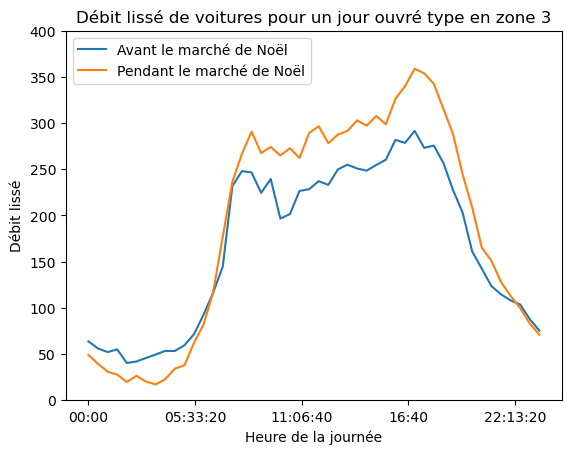

In [130]:
# Journée type en jour ouvré voitures zone 3

SIRAC_avant_marche_zone_3_ouvre_voitures = SIRAC_avant_marche_zone_3_voitures[SIRAC_avant_marche_zone_3_voitures['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_3_ouvre_voitures = SIRAC_apres_marche_zone_3_voitures[SIRAC_apres_marche_zone_3_voitures['jour_semaine'].isin(jour_ouvre)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_3_ouvre_voitures.plot(title = 'Débit lissé de voitures pour un jour ouvré type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_3_ouvre_voitures.plot(title = 'Débit lissé de voitures pour un jour ouvré type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

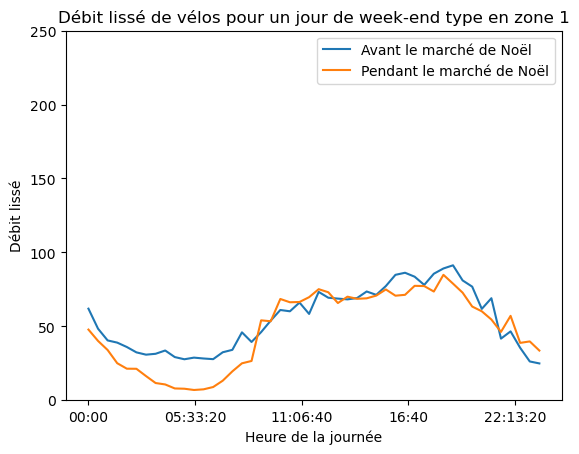

In [134]:
# Journée type en jour de week-end vélos zone 1

SIRAC_avant_marche_zone_1_we_velos = SIRAC_avant_marche_zone_1_velos[SIRAC_avant_marche_zone_1_velos['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_1_we_velos = SIRAC_apres_marche_zone_1_velos[SIRAC_apres_marche_zone_1_velos['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_1_we_velos.plot(title = 'Débit lissé de vélos pour un jour de week-end type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_1_we_velos.plot(title = 'Débit lissé de vélos pour un jour de week-end type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,250))

plt.legend()

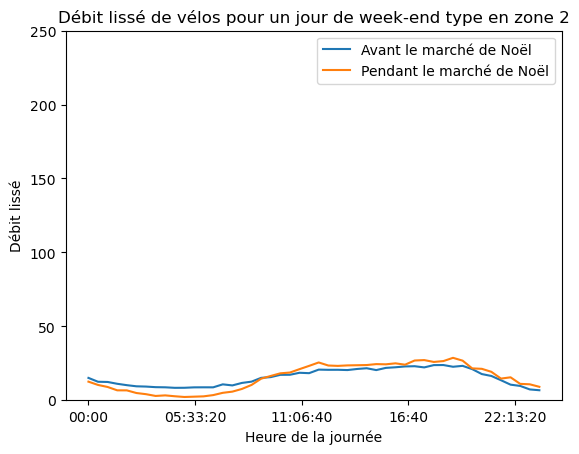

In [135]:
# Journée type en jour de week-end vélos zone 2

SIRAC_avant_marche_zone_2_we_velos = SIRAC_avant_marche_zone_2_velos[SIRAC_avant_marche_zone_2_velos['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_2_we_velos = SIRAC_apres_marche_zone_2_velos[SIRAC_apres_marche_zone_2_velos['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_2_we_velos.plot(title = 'Débit lissé de vélos pour un jour de week-end type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_2_we_velos.plot(title = 'Débit lissé de vélos pour un jour de week-end type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,250))

plt.legend()

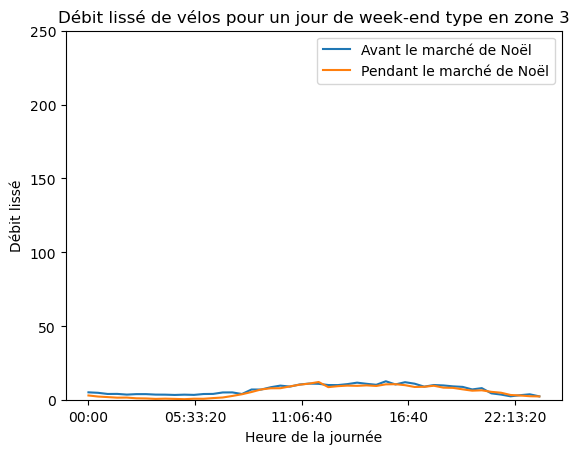

In [136]:
# Journée type en jour de week-end vélos zone 3

SIRAC_avant_marche_zone_3_we_velos = SIRAC_avant_marche_zone_3_velos[SIRAC_avant_marche_zone_3_velos['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_3_we_velos = SIRAC_apres_marche_zone_3_velos[SIRAC_apres_marche_zone_3_velos['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_3_we_velos.plot(title = 'Débit lissé de vélos pour un jour de week-end type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_3_we_velos.plot(title = 'Débit lissé de vélos pour un jour de week-end type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,250))

plt.legend()

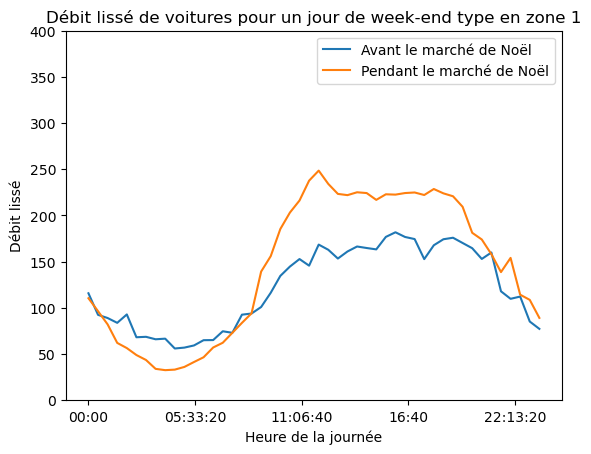

In [137]:
# Journée type en jour de week-end voitures zone 1

SIRAC_avant_marche_zone_1_we_voitures = SIRAC_avant_marche_zone_1_voitures[SIRAC_avant_marche_zone_1_voitures['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_1_we_voitures = SIRAC_apres_marche_zone_1_voitures[SIRAC_apres_marche_zone_1_voitures['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_1_we_voitures.plot(title = 'Débit lissé de voitures pour un jour de week-end type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_1_we_voitures.plot(title = 'Débit lissé de voitures pour un jour de week-end type en zone 1', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

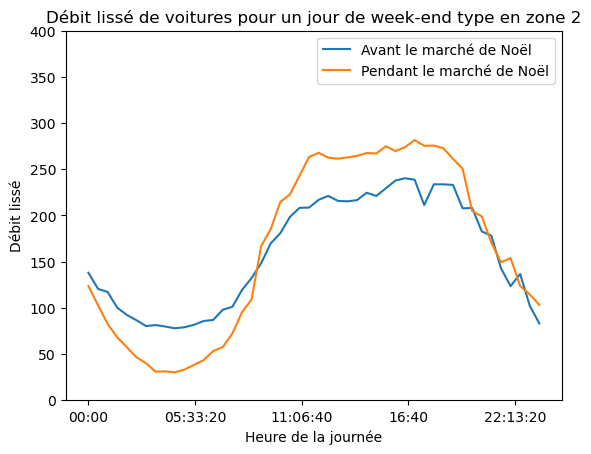

In [138]:
# Journée type en jour de week-end voitures zone 2

SIRAC_avant_marche_zone_2_we_voitures = SIRAC_avant_marche_zone_2_voitures[SIRAC_avant_marche_zone_2_voitures['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_2_we_voitures = SIRAC_apres_marche_zone_2_voitures[SIRAC_apres_marche_zone_2_voitures['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_2_we_voitures.plot(title = 'Débit lissé de voitures pour un jour de week-end type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_2_we_voitures.plot(title = 'Débit lissé de voitures pour un jour de week-end type en zone 2', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()

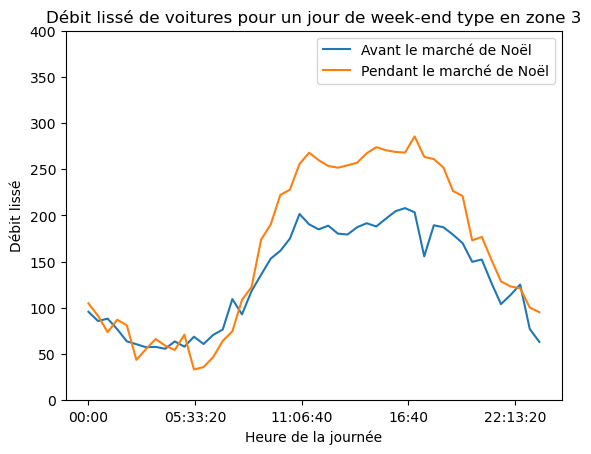

In [139]:
# Journée type en jour de week-end voitures zone 3

SIRAC_avant_marche_zone_3_we_voitures = SIRAC_avant_marche_zone_3_voitures[SIRAC_avant_marche_zone_3_voitures['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()
SIRAC_apres_marche_zone_3_we_voitures = SIRAC_apres_marche_zone_3_voitures[SIRAC_apres_marche_zone_3_voitures['jour_semaine'].isin(week_end)].groupby('demi_heure')['debitlisse'].mean()

SIRAC_avant_marche_zone_3_we_voitures.plot(title = 'Débit lissé de voitures pour un jour de week-end type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Avant le marché de Noël")

SIRAC_apres_marche_zone_3_we_voitures.plot(title = 'Débit lissé de voitures pour un jour de week-end type en zone 3', 
                                     ylabel = 'Débit lissé',
                                     xlabel = 'Heure de la journée',
                                     label= "Pendant le marché de Noël",
                                     ylim = (0,400))

plt.legend()